source: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-download-auto-examples-preprocessing-plot-all-scaling-py


# Compare the effect of different scalers on data with outliers

Feature 0 (median income in a block) and feature 5 (average house occupancy) of
the `california_housing_dataset` have very
different scales and contain some very large outliers. These two
characteristics lead to difficulties to visualize the data and, more
importantly, they can degrade the predictive performance of many machine
learning algorithms. Unscaled data can also slow down or even prevent the
convergence of many gradient-based estimators.

Indeed many estimators are designed with the assumption that each feature takes
values close to zero or more importantly that all features vary on comparable
scales. In particular, metric-based and gradient-based estimators often assume
approximately standardized data (centered features with unit variances). A
notable exception are decision tree-based estimators that are robust to
arbitrary scaling of the data.

This example uses different scalers, transformers, and normalizers to bring the
data within a pre-defined range.

Scalers are linear (or more precisely affine) transformers and differ from each
other in the way they estimate the parameters used to shift and scale each
feature.

:class:`~sklearn.preprocessing.QuantileTransformer` provides non-linear
transformations in which distances
between marginal outliers and inliers are shrunk.
:class:`~sklearn.preprocessing.PowerTransformer` provides
non-linear transformations in which data is mapped to a normal distribution to
stabilize variance and minimize skewness.

Unlike the previous transformations, normalization refers to a per sample
transformation instead of a per feature transformation.

The following code is a bit verbose, feel free to jump directly to the analysis
of the results_.



# Сравните влияние различных масштабаторов на данные с выбросами

Признак 0 (средний доход в квартале) и признак 5 (средняя заполняемость дома) набора данных по жилищному строительству Калифорнии имеют очень разные масштабы и содержат некоторые очень большие выбросы. Эти две характеристики приводят к трудностям с визуализацией данных и, что более важно, они могут ухудшить прогнозирующую эффективность многих алгоритмов машинного обучения. Немасштабированные данные также могут замедлить или даже предотвратить сходимость многих оценщиков на основе градиента.

Действительно, многие оценщики разработаны с предположением, что каждый признак принимает значения, близкие к нулю, или, что более важно, все признаки различаются в сопоставимых масштабах. В частности, оценщики на основе метрик и градиентов часто предполагают приблизительно стандартизированные данные (центрированные признаки с единичными отклонениями). Заметным исключением являются оценщики на основе дерева решений, устойчивые к произвольному масштабированию данных.

В этом примере используются различные масштабаторы, преобразователи и нормализаторы для приведения данных в заранее определенный диапазон.

Скалеры представляют собой линейные (или, точнее, аффинные) преобразователи и отличаются друг от друга способом оценки параметров, используемых для смещения и масштабирования каждого признака.

QuantileTransformer обеспечивает нелинейные преобразования, при которых расстояния между крайними выбросами и вкладками сокращаются. 
PowerTransformer обеспечивает нелинейные преобразования, при которых данные сопоставляются с нормальным распределением для стабилизации дисперсии и минимизации асимметрии.

В отличие от предыдущих преобразований, нормализация относится к преобразованию по выборке, а не по признаку.

Следующий код немного многословен, поэтому смело переходите непосредственно к анализу результатов.

In [40]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

import matplotlib as mpl
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
feature_names = dataset.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HouseAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
features = ["MedInc", "AveOccup"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler(quantile_range=(25, 75)).fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X),
    ),
    (
        "Data after quantile transformation (uniform pdf)",
        QuantileTransformer(
            output_distribution="uniform", random_state=42
        ).fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian pdf)",
        QuantileTransformer(
            output_distribution="normal", random_state=42
        ).fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

Two plots will be shown for each scaler/normalizer/transformer. The left
figure will show a scatter plot of the full data set while the right figure
will exclude the extreme values considering only 99 % of the data set,
excluding marginal outliers. In addition, the marginal distributions for each
feature will be shown on the sides of the scatter plot.



Для каждого масштабатора/нормализатора/трансформатора будут показаны два графика. 
На левом рисунке показана точечная диаграмма всего набора данных, 
а на правом рисунке исключены экстремальные значения, 
учитывающие только 99 % набора данных, исключая маргинальные выбросы. 
Кроме того, по бокам диаграммы рассеяния будут показаны предельные распределения для каждого признака.

In [41]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )


## Original data

Each transformation is plotted showing two transformed features, with the
left plot showing the entire dataset, and the right zoomed-in to show the
dataset without the marginal outliers. A large majority of the samples are
compacted to a specific range, [0, 10] for the median income and [0, 6] for
the average house occupancy. Note that there are some marginal outliers (some
blocks have average occupancy of more than 1200). Therefore, a specific
pre-processing can be very beneficial depending of the application. In the
following, we present some insights and behaviors of those pre-processing
methods in the presence of marginal outliers.




## Исходные данные

На графике каждого преобразования показаны два преобразованных объекта: 
левый график показывает весь набор данных, а правый — увеличенный, 
чтобы показать набор данных без пограничных выбросов. Подавляющее 
большинство выборок сведены к определенному диапазону: 
[0, 10] для среднего дохода и [0, 6] для средней занятости дома. 
Обратите внимание, что есть некоторые незначительные выбросы 
(средняя заселенность некоторых блоков превышает 1200 человек). 
Таким образом, определенная предварительная обработка может быть 
очень полезной в зависимости от приложения. Ниже мы представляем 
некоторые идеи и поведение этих методов предварительной обработки 
при наличии маргинальных выбросов.

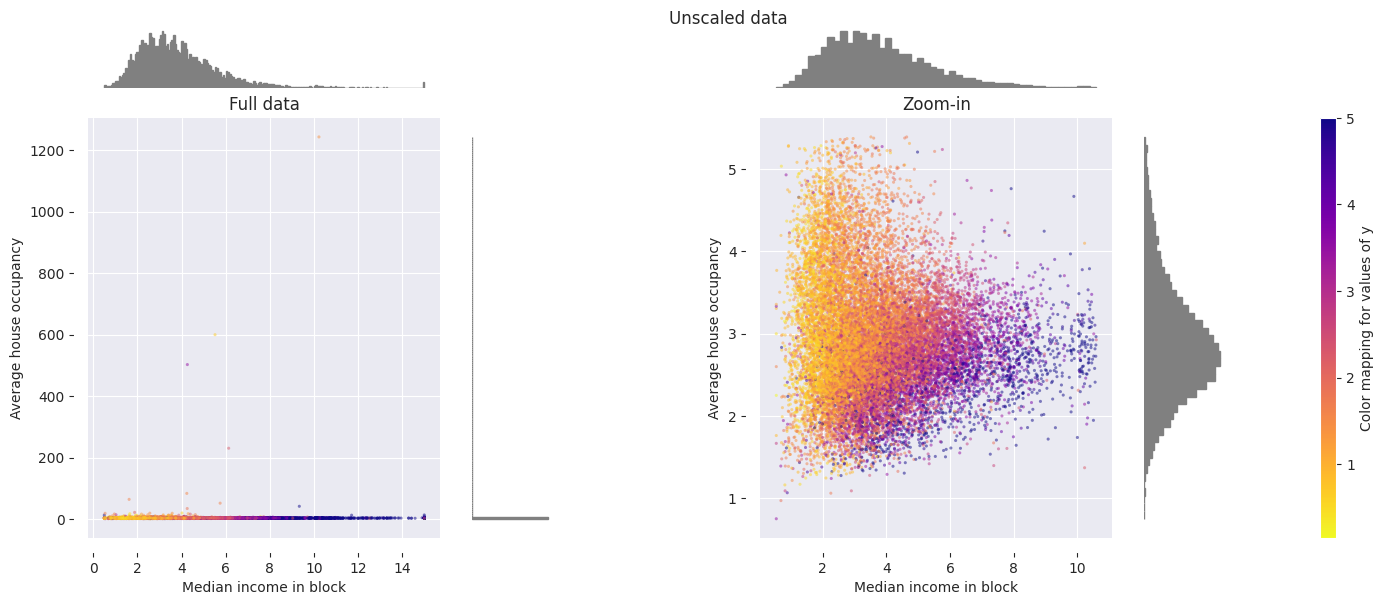

In [42]:
make_plot(0)


## StandardScaler

:class:`~sklearn.preprocessing.StandardScaler` removes the mean and scales
the data to unit variance. The scaling shrinks the range of the feature
values as shown in the left figure below.
However, the outliers have an influence when computing the empirical mean and
standard deviation. Note in particular that because the outliers on each
feature have different magnitudes, the spread of the transformed data on
each feature is very different: most of the data lie in the [-2, 4] range for
the transformed median income feature while the same data is squeezed in the
smaller [-0.2, 0.2] range for the transformed average house occupancy.

:class:`~sklearn.preprocessing.StandardScaler` therefore cannot guarantee
balanced feature scales in the
presence of outliers.




## Стандартный скалер

StandardScaler удаляет среднее значение и масштабирует данные до единичной дисперсии. 
Масштабирование сужает диапазон значений функции, как показано на левом рисунке ниже. 
Однако выбросы оказывают влияние на вычисление эмпирического среднего и стандартного отклонения. 
Обратите внимание, в частности, что, поскольку выбросы по каждому признаку имеют разные величины, 
разброс преобразованных данных по каждому признаку очень разный: 
большая часть данных лежит в диапазоне [-2, 4] для преобразованного признака медианного дохода, 
в то время как данные сжимаются в меньший диапазон [-0,2, 0,2] для преобразованной средней занятости дома.

StandardScaler поэтому не может гарантировать сбалансированность масштабов признаков при наличии выбросов.

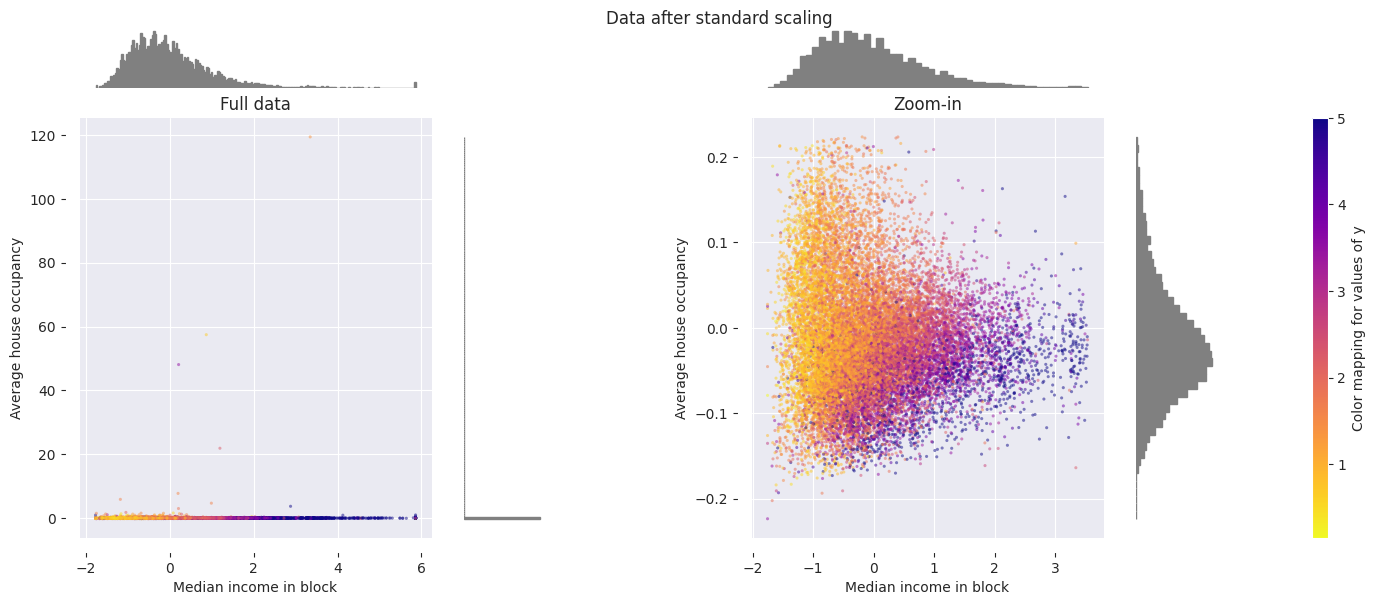

In [43]:
make_plot(1)


## MinMaxScaler

:class:`~sklearn.preprocessing.MinMaxScaler` rescales the data set such that
all feature values are in
the range [0, 1] as shown in the right panel below. However, this scaling
compresses all inliers into the narrow range [0, 0.005] for the transformed
average house occupancy.

Both :class:`~sklearn.preprocessing.StandardScaler` and
:class:`~sklearn.preprocessing.MinMaxScaler` are very sensitive to the
presence of outliers.




## МинМаксСкалер

MinMaxScaler изменяет масштаб набора данных так, чтобы все значения функций 
находились в диапазоне [0, 1], как показано на правой панели ниже. 
Однако это масштабирование сжимает все значения в узкий диапазон [0, 0,005] 
для преобразованной средней занятости дома.

Оба StandardScaler и MinMaxScaler очень чувствительны к наличию выбросов.

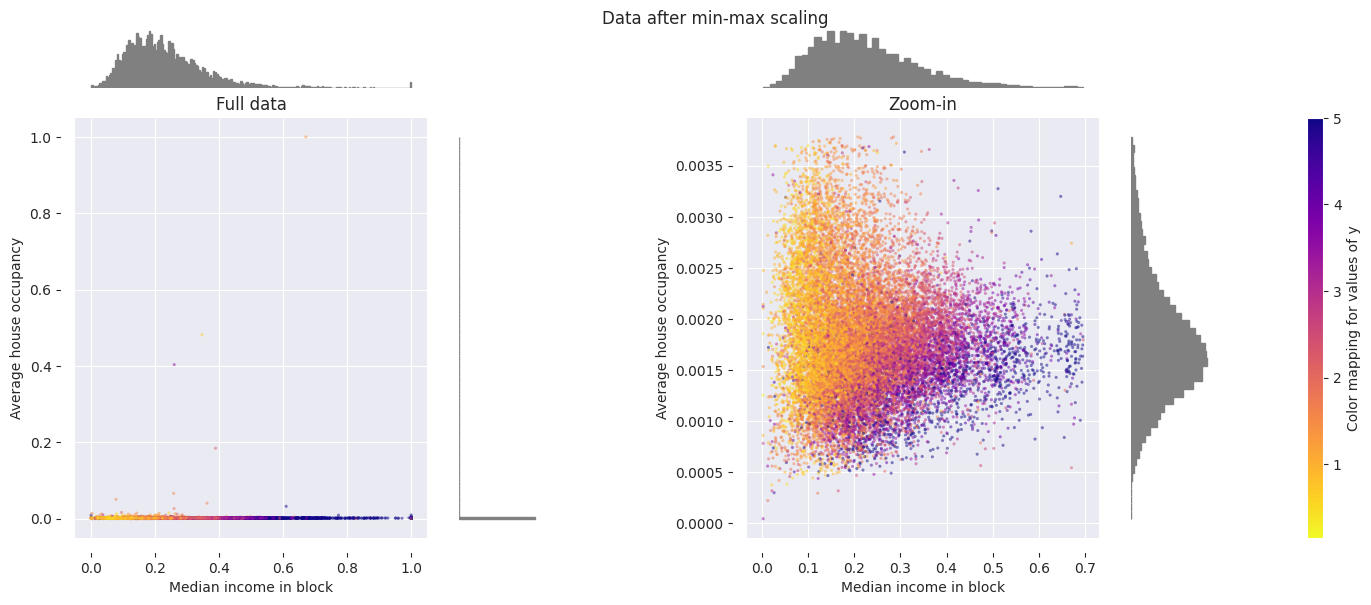

In [44]:
make_plot(2)


## MaxAbsScaler

:class:`~sklearn.preprocessing.MaxAbsScaler` is similar to
:class:`~sklearn.preprocessing.MinMaxScaler` except that the
values are mapped across several ranges depending on whether negative
OR positive values are present. If only positive values are present, the
range is [0, 1]. If only negative values are present, the range is [-1, 0].
If both negative and positive values are present, the range is [-1, 1].
On positive only data, both :class:`~sklearn.preprocessing.MinMaxScaler`
and :class:`~sklearn.preprocessing.MaxAbsScaler` behave similarly.
:class:`~sklearn.preprocessing.MaxAbsScaler` therefore also suffers from
the presence of large outliers.




## MaxAbsScaler

MaxAbsScaler аналогично, за MinMaxScaler исключением того, 
что значения сопоставляются с несколькими диапазонами в зависимости от того, 
присутствуют ли отрицательные ИЛИ положительные значения. 
Если присутствуют только положительные значения, диапазон равен [0, 1]. 
Если присутствуют только отрицательные значения, диапазон составляет [-1, 0]. 
Если присутствуют как отрицательные, так и положительные значения, диапазон составляет [-1, 1]. 
По положительным только данным, оба MinMaxScaler и MaxAbsScaler ведут себя одинаково. 
MaxAbsScaler поэтому также страдает от наличия крупных выбросов.

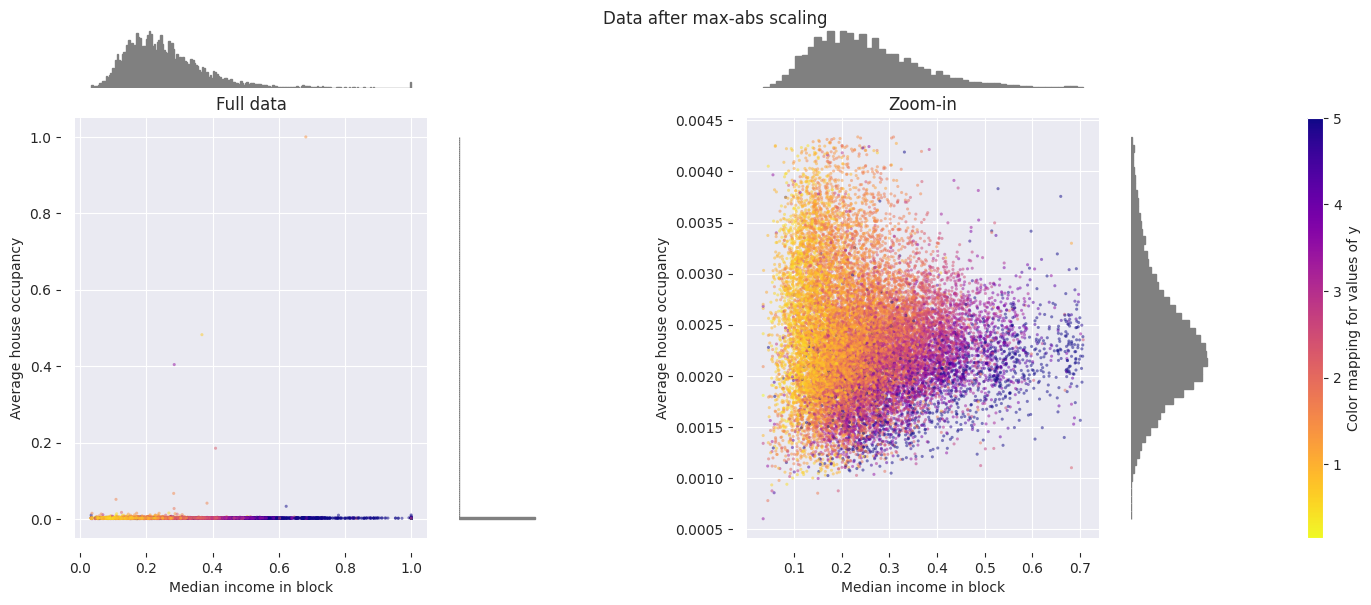

In [45]:
make_plot(3)


## RobustScaler

Unlike the previous scalers, the centering and scaling statistics of
:class:`~sklearn.preprocessing.RobustScaler`
are based on percentiles and are therefore not influenced by a small
number of very large marginal outliers. Consequently, the resulting range of
the transformed feature values is larger than for the previous scalers and,
more importantly, are approximately similar: for both features most of the
transformed values lie in a [-2, 3] range as seen in the zoomed-in figure.
Note that the outliers themselves are still present in the transformed data.
If a separate outlier clipping is desirable, a non-linear transformation is
required (see below).




## Робастскалер

В отличие от предыдущих масштабаторов, статистика центрирования и 
масштабирования RobustScaler основана на процентилях и, следовательно, 
не зависит от небольшого количества очень больших предельных выбросов. 
Следовательно, результирующий диапазон преобразованных значений признаков шире, 
чем для предыдущих масштабаторов, и, что более важно, они примерно одинаковы: 
для обоих объектов большинство преобразованных значений лежат в диапазоне [-2, 3], 
как видно на увеличенном изображении. на рисунке. 
Обратите внимание, что сами выбросы все еще присутствуют в преобразованных данных. 
Если желательно отдельное отсечение выбросов, требуется нелинейное преобразование (см. ниже).

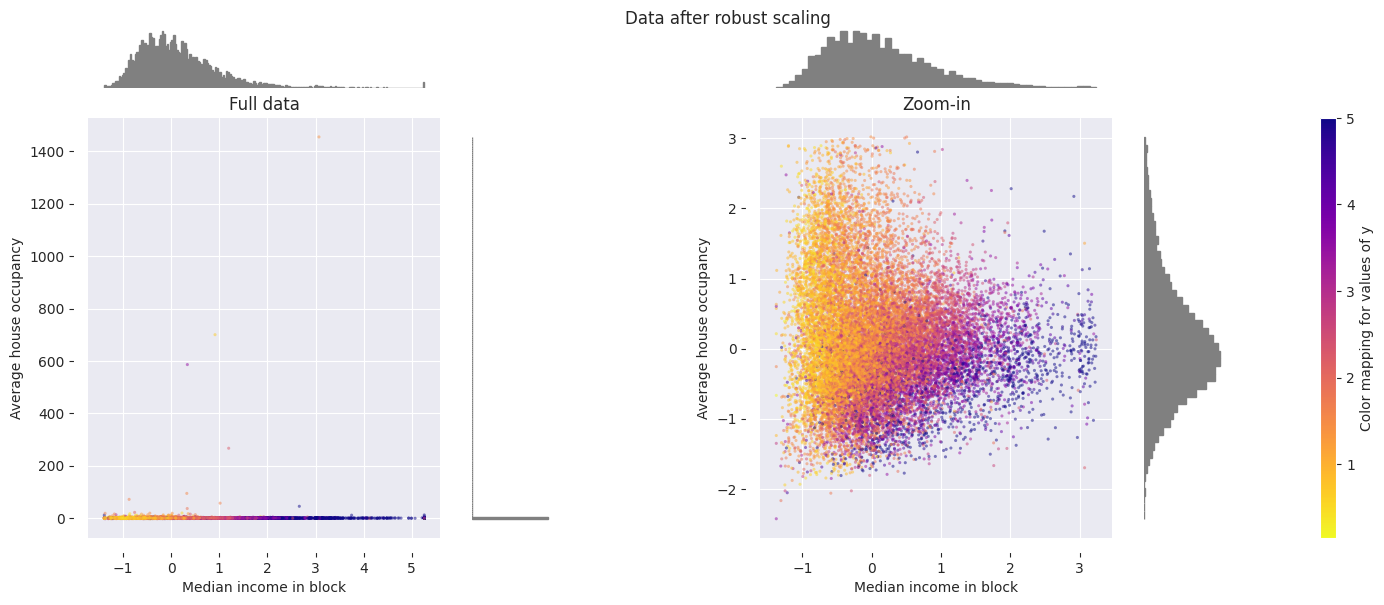

In [46]:
make_plot(4)


## PowerTransformer

:class:`~sklearn.preprocessing.PowerTransformer` applies a power
transformation to each feature to make the data more Gaussian-like in order
to stabilize variance and minimize skewness. Currently the Yeo-Johnson
and Box-Cox transforms are supported and the optimal
scaling factor is determined via maximum likelihood estimation in both
methods. By default, :class:`~sklearn.preprocessing.PowerTransformer` applies
zero-mean, unit variance normalization. Note that
Box-Cox can only be applied to strictly positive data. Income and average
house occupancy happen to be strictly positive, but if negative values are
present the Yeo-Johnson transformed is preferred.




## Силовой трансформатор

PowerTransformer применяет степенное преобразование к каждому признаку, 
чтобы сделать данные более гауссовыми, чтобы стабилизировать дисперсию и 
минимизировать асимметрию. В настоящее время поддерживаются преобразования 
Йео-Джонсона и Бокса-Кокса, а оптимальный коэффициент масштабирования 
определяется посредством оценки максимального правдоподобия в обоих методах. 
По умолчанию PowerTransformer применяется нормализация единичной дисперсии с 
нулевым средним значением. Обратите внимание, что Box-Cox можно применять только 
к строго положительным данным. Доход и средняя заполняемость дома оказываются 
строго положительными, но если присутствуют отрицательные значения, предпочтение 
отдается преобразованию Йео-Джонсона.

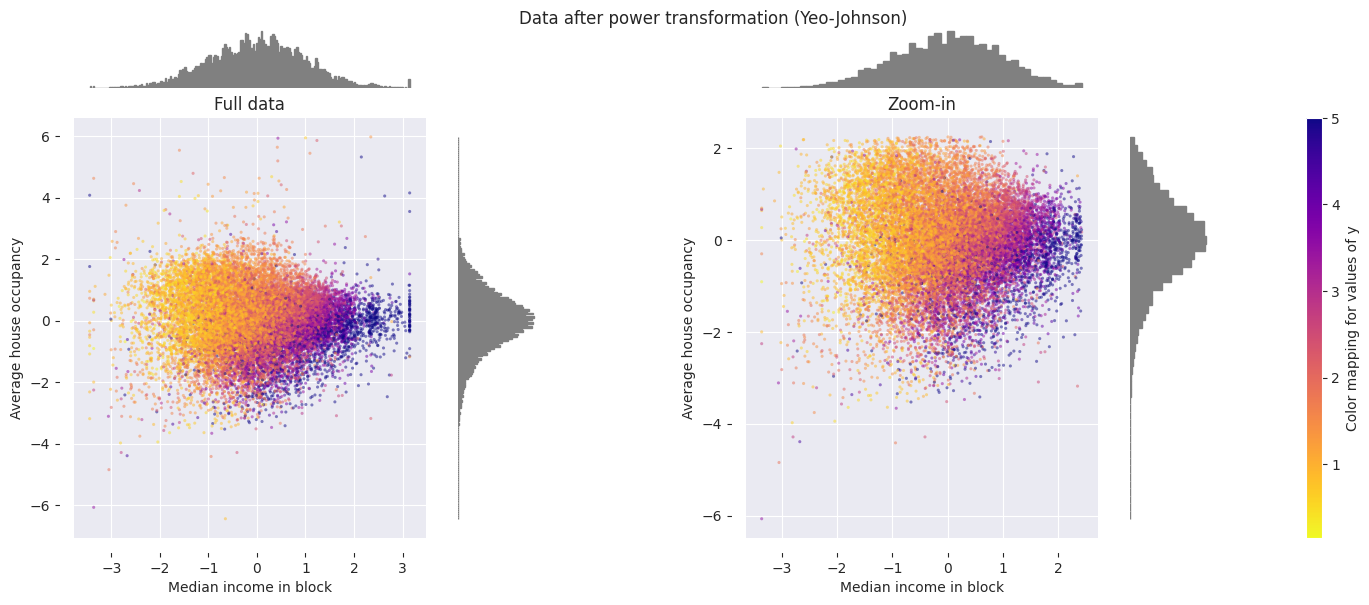

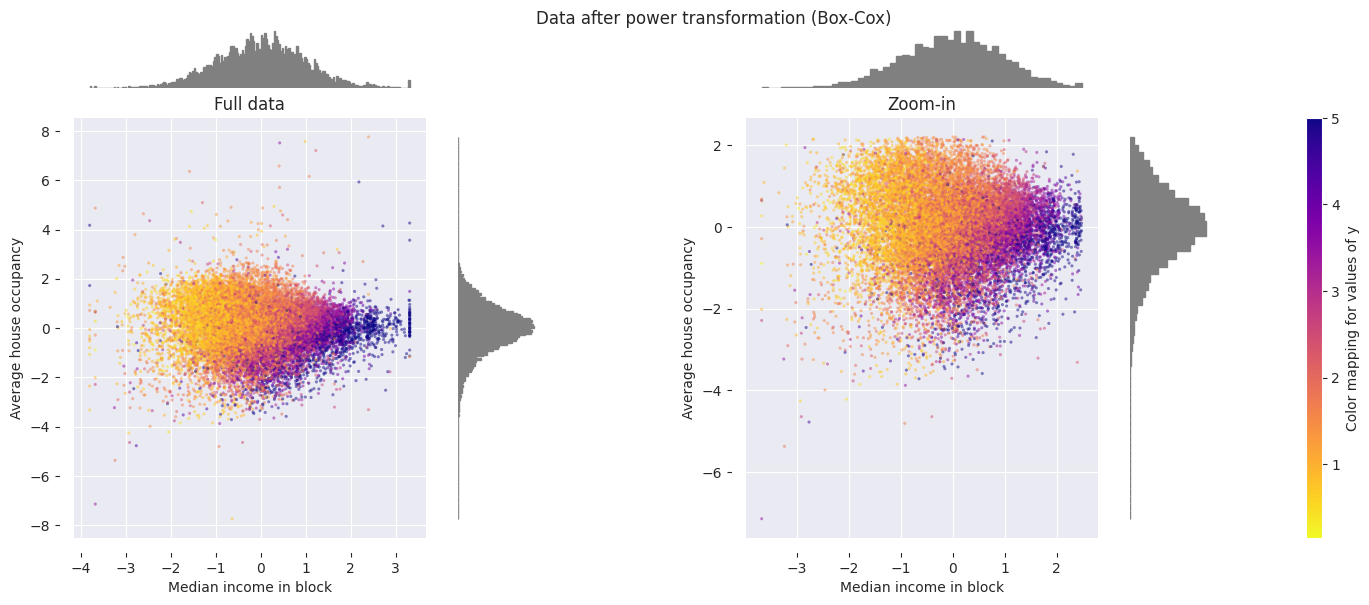

In [47]:
make_plot(5)
make_plot(6)


## QuantileTransformer (uniform output)

:class:`~sklearn.preprocessing.QuantileTransformer` applies a non-linear
transformation such that the
probability density function of each feature will be mapped to a uniform
or Gaussian distribution. In this case, all the data, including outliers,
will be mapped to a uniform distribution with the range [0, 1], making
outliers indistinguishable from inliers.

:class:`~sklearn.preprocessing.RobustScaler` and
:class:`~sklearn.preprocessing.QuantileTransformer` are robust to outliers in
the sense that adding or removing outliers in the training set will yield
approximately the same transformation. But contrary to
:class:`~sklearn.preprocessing.RobustScaler`,
:class:`~sklearn.preprocessing.QuantileTransformer` will also automatically
collapse any outlier by setting them to the a priori defined range boundaries
(0 and 1). This can result in saturation artifacts for extreme values.




## QuantileTransformer (равномерный вывод)

QuantileTransformer применяет нелинейное преобразование, 
так что функция плотности вероятности каждого объекта будет отображаться 
в равномерное или гауссово распределение. В этом случае все данные, 
включая выбросы, будут сопоставлены с равномерным распределением в диапазоне [0, 1], 
что сделает выбросы неотличимыми от выбросов.

RobustScaler и QuantileTransformer устойчивы к выбросам в том смысле, 
что добавление или удаление выбросов в обучающем наборе приведет к примерно 
такому же преобразованию. Но, в отличие от RobustScaler, QuantileTransformer
также автоматически сворачивает любые выбросы, устанавливая их в заранее 
определенные границы диапазона (0 и 1). 
Это может привести к появлению артефактов насыщения для экстремальных значений.

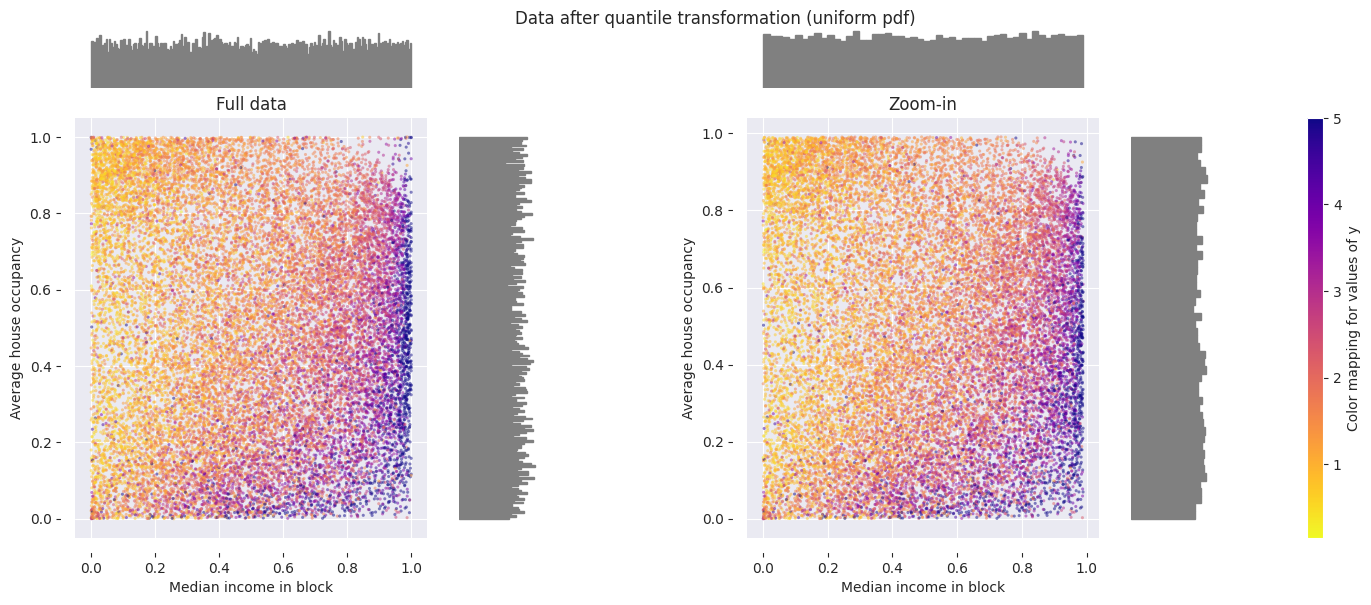

In [48]:
make_plot(7)

## QuantileTransformer (Gaussian output)

To map to a Gaussian distribution, set the parameter
``output_distribution='normal'``.




## QuantileTransformer (выход по Гауссу)

Чтобы сопоставить распределение Гаусса, установите параметр output_distribution='normal'.

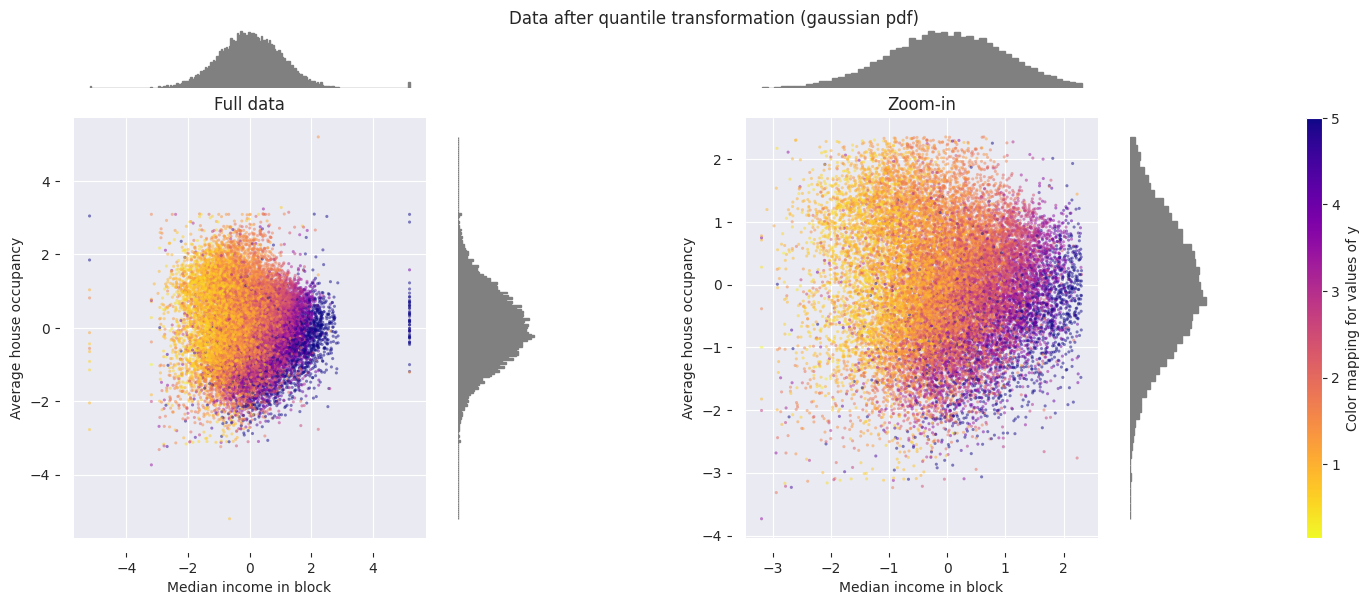

In [49]:
make_plot(8)


## Normalizer

The :class:`~sklearn.preprocessing.Normalizer` rescales the vector for each
sample to have unit norm,
independently of the distribution of the samples. It can be seen on both
figures below where all samples are mapped onto the unit circle. In our
example the two selected features have only positive values; therefore the
transformed data only lie in the positive quadrant. This would not be the
case if some original features had a mix of positive and negative values.




## Нормализатор

Вектор масштабируется Normalizer для каждой выборки, 
чтобы иметь единичную норму, независимо от распределения выборок. 
Это можно увидеть на обоих рисунках ниже, где все образцы отображены 
на единичном круге. В нашем примере две выбранные функции имеют 
только положительные значения; поэтому преобразованные данные лежат 
только в положительном квадранте. Это было бы не так, если бы некоторые 
исходные функции имели сочетание положительных и отрицательных значений.

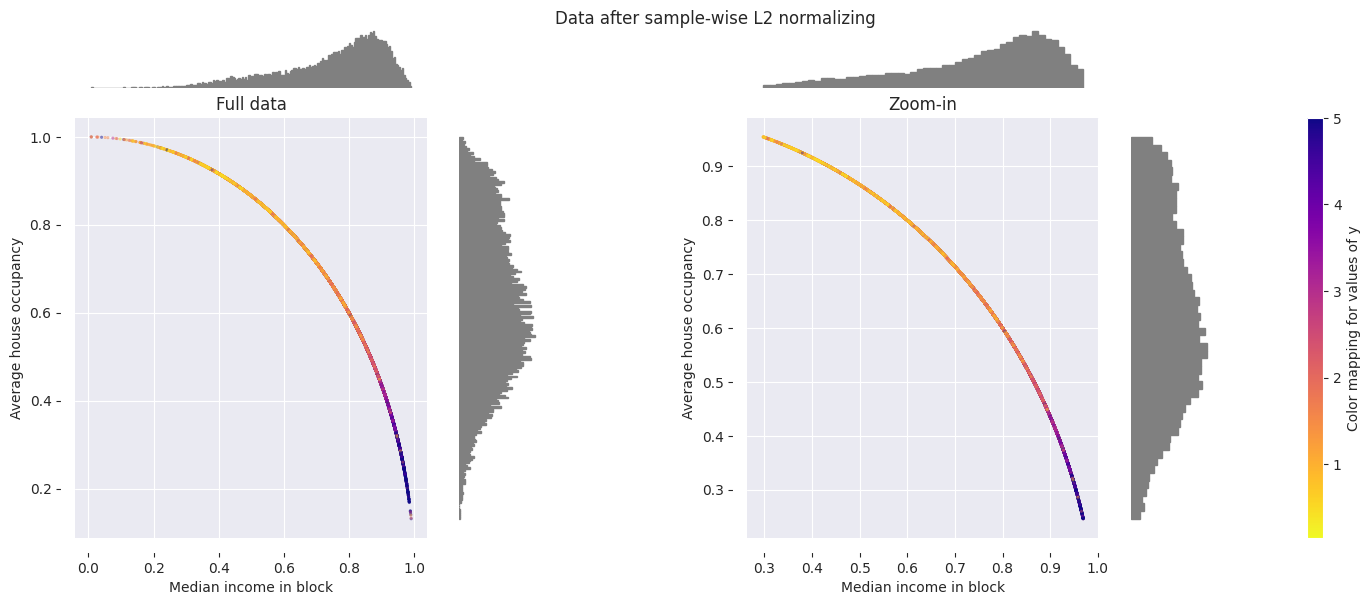

In [50]:
make_plot(9)

plt.show()